In [1]:
%load_ext autoreload
%autoreload 2
from common import *

In [2]:
RESULT_JSON = "/Users/law/repos/viper/results/reclaim/reclaim.json"

### Rename all PmemHybrid to A_PmemHybrid (capital A) to fix the sorting

In [8]:
FIXTURES = [VIPER, DRAM_MAP, HYBRID_FASTER, NVM_FASTER, PMEMKV]
BM_TYPES = ['WRITE', 'READ']

BMS = get_all_runs(RESULT_JSON)
# pprint(BMS) 

BM_TYPE_RE = re.compile(r'.*reclaim_var_(.+?)/.*/threads:(\d+)')

def get_reclaim_bm_type(bm_name):
    match = BM_TYPE_RE.match(bm_name)
    if match is None:
        raise RuntimeError(f"unknown bm type: {bm_name}")
    return (match.group(1), int(match.group(2)) == 33)

RUNS = {}

for bm in BMS:
    reclaim_bm = get_reclaim_bm_type(bm['name'])
    RUNS[reclaim_bm] = bm
        
pprint(RUNS)

{('READ', False): {'cpu_time': 57782092.588781245,
                   'items_per_second': 22116656.965998486,
                   'iterations': 32,
                   'name': 'ViperFixture<std::string,std::string>/reclaim_var_READ/iterations:1/real_time/threads:32',
                   'op_time_ms': 1913258.0,
                   'real_time': 1868430.548230208,
                   'repetition_index': 0,
                   'repetitions': 0,
                   'run_name': 'ViperFixture<std::string,std::string>/reclaim_var_READ/iterations:1/real_time/threads:32',
                   'run_type': 'iteration',
                   'threads': 32,
                   'time_unit': 'us'},
 ('READ', True): {'cpu_time': 44359107.54721212,
                  'items_per_second': 21587935.131449133,
                  'iterations': 33,
                  'name': 'ViperFixture<std::string,std::string>/reclaim_var_READ/iterations:1/real_time/threads:33',
                  'op_time_ms': 1467353.0,
                

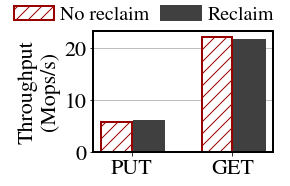

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))

# Set position of bar on X axis
bar_width = 0.30
bar_diff = 0.02
r1 = np.arange(2)
r2 = [x + bar_width + bar_diff for x in r1]

HATCHES = ['//', '', '\\\\', 'x']


write_none = RUNS[('WRITE', False)]['items_per_second'] / MILLION
write_recl = RUNS[('WRITE',  True)]['items_per_second'] / MILLION
read_none =  RUNS[('READ',  False)]['items_per_second'] / MILLION
read_recl =  RUNS[('READ',   True)]['items_per_second'] / MILLION


ax.bar(r1[0], write_none, bar_width, label="No reclaim", edgecolor=COLORS[0], lw=2, hatch='//', color='white')
ax.bar(r2[0], write_recl, bar_width, label='Reclaim', color=COLORS[3], lw=2, edgecolor=COLORS[3])
ax.bar(r1[1], read_none, bar_width, edgecolor=COLORS[0], lw=2, hatch='//', color='white')
ax.bar(r2[1], read_recl, bar_width, color=COLORS[3], lw=2, edgecolor=COLORS[3])


ax.set_xticks([r + (0.5 * bar_width) for r in range(2)])
ax.set_axisbelow(True)
ax.grid(axis='y', which='major')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(17)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)


ax.set_ylabel("Throughput\n(Mops/s)", fontsize=22)
ax.set_xticklabels(['PUT', 'GET'], fontsize=22)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), 
           ncol=2, frameon=False, fontsize=20, columnspacing=0.6, handletextpad=0.3)

fig.savefig('charts/reclaim.pdf', bbox_inches='tight')
fig.savefig('charts/reclaim.svg', bbox_inches='tight')